In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Exploratory Data Analysis


In [139]:
df = pd.read_excel("marketing_data.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0


#### Data Profiling


In [140]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [141]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

#### Unique Values for Categorical Variables


In [142]:
for col in ['Education', 'Marital_Status']:
    print(f"Unique values in {col}:", df[col].unique())

Unique values in Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


#### Univariate Analysis


Count plot for Complain


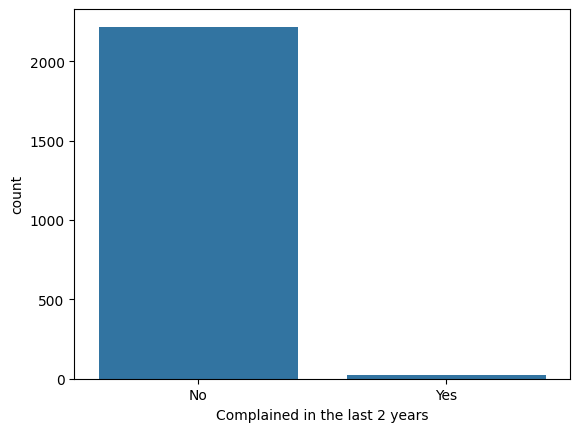

In [143]:
sns.countplot(x='Complain', data=df)
plt.xlabel('Complained in the last 2 years')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Histogram for Income


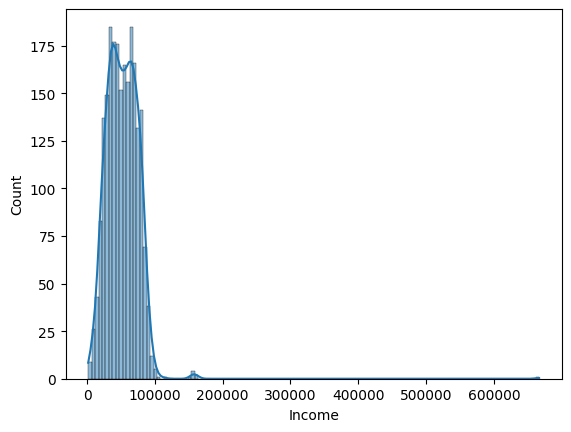

In [144]:
sns.histplot(df['Income'], kde=True)
plt.xlabel('Income')
plt.show()

Bar chart for Education


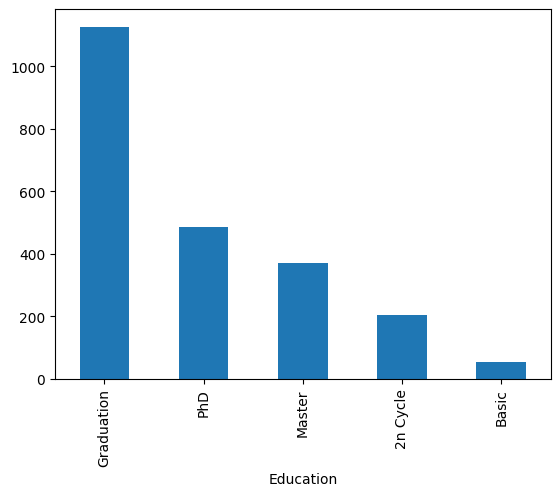

In [145]:
df['Education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.show()

Pie Chart for Marital Status


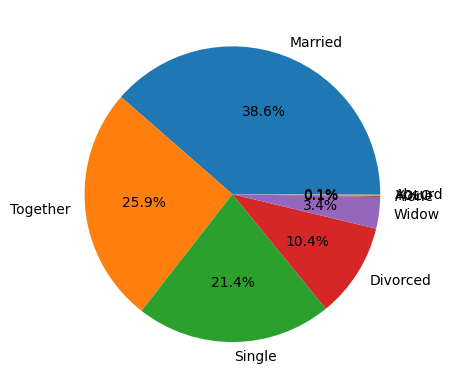

In [146]:
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

#### Bivariate Analysis


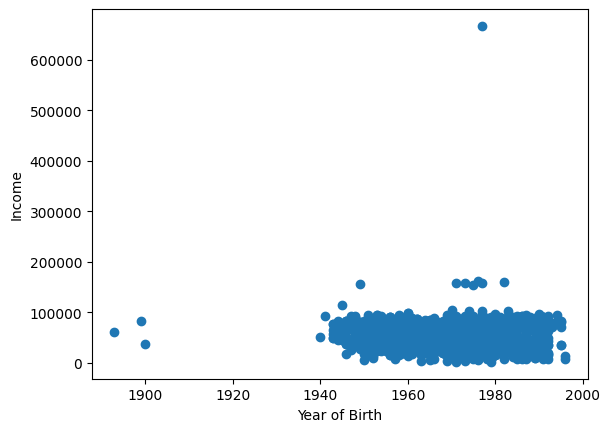

In [147]:
plt.scatter(df['Year_Birth'], df['Income'])
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.show()

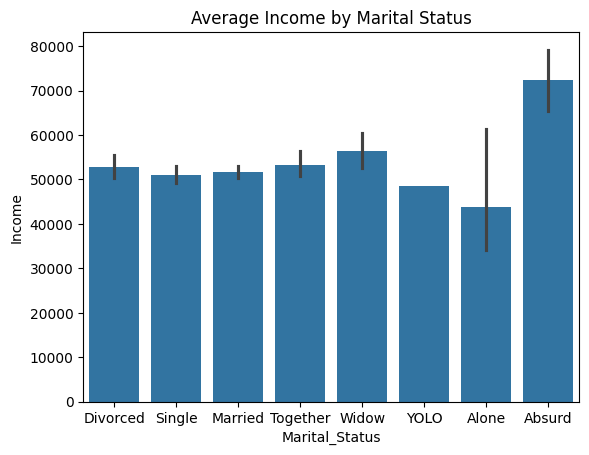

In [148]:
sns.barplot(x='Marital_Status', y='Income', data=df)
plt.title('Average Income by Marital Status')
plt.show()

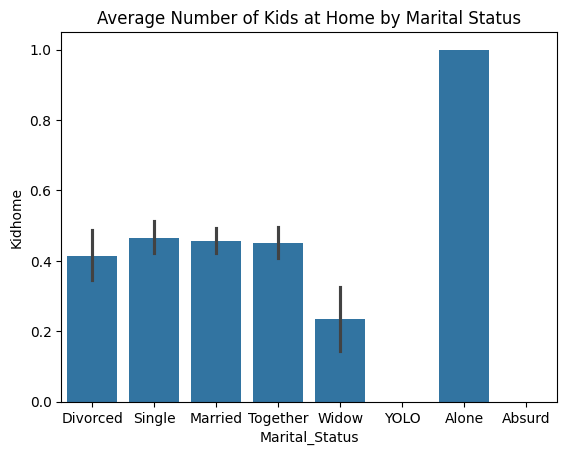

In [149]:
sns.barplot(x='Marital_Status', y='Kidhome', data=df)
plt.title('Average Number of Kids at Home by Marital Status')
plt.show()

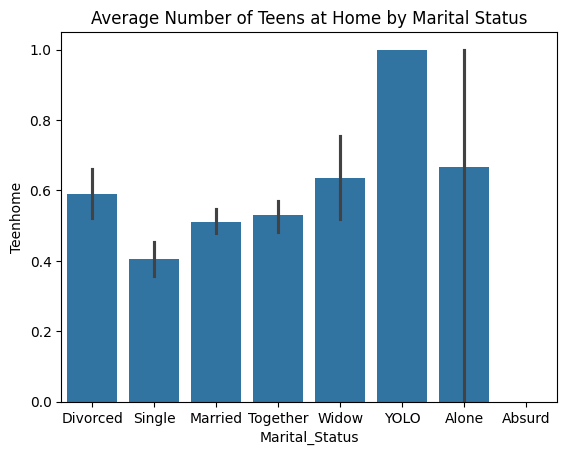

In [150]:
sns.barplot(x='Marital_Status', y='Teenhome', data=df)
plt.title('Average Number of Teens at Home by Marital Status')
plt.show()

#### Check the relationship between/among features


Check correlation between Income and Education


In [151]:
education_income_values = pd.get_dummies(
    df, columns=['Education'], prefix='Education')

education_columns = [
    col for col in education_income_values.columns if 'Education_' in col]
income_education_correlation = education_income_values[[
    'Income'] + education_columns].corr()['Income'][1:]

print("Correlation between Income and Education Levels:")
print(income_education_correlation)

Correlation between Income and Education Levels:
Education_2n Cycle     -0.057745
Education_Basic        -0.200576
Education_Graduation    0.018935
Education_Master        0.011827
Education_PhD           0.081552
Name: Income, dtype: float64


- All the relationships here are weak, indicating that education level is not a strong predictor of income of customers


Check correlation between Complain and Education


In [152]:
from scipy.stats import chi2_contingency

education_contingency_table = pd.crosstab(df['Education'], df['Complain'])
chi2, p, dof, expected = chi2_contingency(education_contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 0.11620258344593623


- With the p-value(0.203) being greater than 0.05, this means that there is not enough evidence to associate education with the customer complaint in the last 2 years


Check correlation between Income and Marital Status


In [153]:
marital_income_values = pd.get_dummies(
    df, columns=['Marital_Status'], prefix='Marital_Status')

marital_columns = [
    col for col in marital_income_values.columns if 'Marital_Status_' in col]
income_marital_correlation = marital_income_values[[
    'Income'] + marital_columns].corr()['Income'][1:]

print("Correlation between Income and Marital Status:")
print(income_marital_correlation)

Correlation between Income and Marital Status:
Marital_Status_Absurd      0.024026
Marital_Status_Alone      -0.012374
Marital_Status_Divorced    0.007975
Marital_Status_Married    -0.016479
Marital_Status_Single     -0.025843
Marital_Status_Together    0.023425
Marital_Status_Widow       0.031706
Marital_Status_YOLO       -0.004556
Name: Income, dtype: float64


- All the relationships here are weak, indicating that marital status is not a strong predictor of income of customers


Check correlation between Complain and Marital Status


In [154]:
marital_contingency_table = pd.crosstab(df['Marital_Status'], df['Complain'])
chi2, p, dof, expected = chi2_contingency(marital_contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 0.9870342644720567


- With the p-value(0.754) being grater than 0.05, this means that there is not enough evidence to associate marital status with the customer complaint in the last 2 years


Check correlation between Marital Status and Kidhome, and Marital Status and Teenhome


In [155]:
kidhome_crosstab = pd.crosstab(
    df['Marital_Status'], df['Kidhome'], margins=True, margins_name="Total")
print("Relationship of Marital Status and Kidhome:")
display(kidhome_crosstab)

teenhome_crosstab = pd.crosstab(
    df['Marital_Status'], df['Teenhome'], margins=True, margins_name="Total")
print("\nRelationship of Marital Status and Teenhome:")
display(teenhome_crosstab)

Relationship of Marital Status and Kidhome:


Kidhome,0,1,2,Total
Marital_Status,,,,
Absurd,2,0,0,2
Alone,0,3,0,3
Divorced,140,88,4,232
Married,491,352,21,864
Single,268,201,11,480
Together,331,237,12,580
Widow,59,18,0,77
YOLO,2,0,0,2
Total,1293,899,48,2240



Relationship of Marital Status and Teenhome:


Teenhome,0,1,2,Total
Marital_Status,,,,
Absurd,2,0,0,2
Alone,1,2,0,3
Divorced,101,125,6,232
Married,444,398,22,864
Single,295,175,10,480
Together,286,281,13,580
Widow,29,47,1,77
YOLO,0,2,0,2
Total,1158,1030,52,2240


Use ANOVA test for these relationships


In [156]:
import scipy.stats as stats

f_val, p_val = stats.f_oneway(*[df[df['Marital_Status'] == status]['Kidhome']
                              for status in df['Marital_Status'].unique()])
print(f"ANOVA test for Kidhome by Marital Status: F = {f_val}, p = {p_val}")

f_val, p_val = stats.f_oneway(*[df[df['Marital_Status'] == status]['Teenhome']
                              for status in df['Marital_Status'].unique()])
print(f"ANOVA test for Teenhome by Marital Status: F = {f_val}, p = {p_val}")

ANOVA test for Kidhome by Marital Status: F = 2.8150772422212915, p = 0.006399583359671683
ANOVA test for Teenhome by Marital Status: F = 4.461449687945867, p = 6.0909780334068225e-05


- The p-value scores show that marital status has a significant impact on both the number of kids and the number of teenagers since they are below the significance level of 0.05


## Preprocessing


#### Handle null values


In [157]:
df['Income'].isnull().sum()

24

Check the number of null values in Income with relation to unique combinations of Marital Status and Education


In [158]:
num_null_income_in_unique_combinations = df[df['Income'].isnull()].groupby(
    ['Marital_Status', 'Education']).size().reset_index(name='Count')
num_null_income_in_unique_combinations

,Marital_Status,Education,Count
0,Married,2n Cycle,1
1,Married,Graduation,4
2,Married,PhD,2
3,Single,2n Cycle,1
4,Single,Graduation,6
5,Single,PhD,2
6,Together,2n Cycle,1
7,Together,Graduation,1
8,Together,Master,4
9,Together,PhD,1


Check the skewness of Income


In [159]:
skewness = df['Income'].skew()
print(f"Skewness of Income: {skewness}")

Skewness of Income: 6.763487372811116


Solutions in dealing with the null values

- Fill null values of Income with the median of their respective groups
- Fill null values of Income with 0
- Remove rows with null values


In [160]:
# df['Income'] = df.groupby(['Marital_Status', 'Education'])[
#     'Income'].transform(lambda x: x.fillna(x.median()))

# df['Income'] = df['Income'].fillna(0)

df = df.dropna(subset=['Income'])

#### Feature Engineering


Create Total Children column by combining Kidhome and Teenhome


In [161]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,1


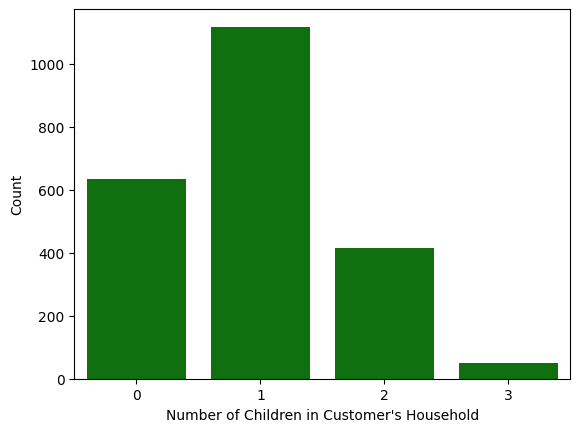

In [162]:
total_children_counts = df['Total_Children'].value_counts().reset_index()
total_children_counts.columns = ['Total_Children', 'Count']

sns.barplot(x='Total_Children', y='Count',
            data=total_children_counts, color='green')
plt.xlabel('Number of Children in Customer\'s Household')
plt.show()

Remove rows with Year_Birth that are not realistically alive today


In [163]:
df = df[~df['Year_Birth'].isin([1893, 1899, 1900])]

# check if the rows are removed
# df[df['Year_Birth'] == 1893]
# df[df['Year_Birth'] == 1899]
df[df['Year_Birth'] == 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children


Convert Dt_Customer values to datetime and create another column for days since they first became a customer


In [164]:
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

current_date = datetime.now()
df['Days since Customer'] = (current_date - df['Dt_Customer']).dt.days

df.head()

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_3728\2892843070.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children,Days since Customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,0,3538
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,0,3539
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,1,3572
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,2,3396
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,1,3489


Check if there are future dates


In [165]:
df[df['Dt_Customer'] > current_date]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children,Days since Customer


Check if there are customer dates that are older than customer's year of birth (this is invalid)


In [166]:
df[~df.apply(
    lambda row: row['Dt_Customer'].year > row['Year_Birth'], axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children,Days since Customer


Check what is the youngest and oldest age of when they first became a customer


In [167]:
df['Age_at_Customer_Date'] = df['Dt_Customer'].dt.year - df['Year_Birth']

print("Youngest Age as First Time Customer: ",
      df['Age_at_Customer_Date'].min())
print("Oldest Age as First Time Customer: ", df['Age_at_Customer_Date'].max())

Youngest Age as First Time Customer:  16
Oldest Age as First Time Customer:  73


Replace the invalid values of marital status with more appropriate ones


In [168]:
df['Marital_Status'] = df['Marital_Status'].replace(
    {'YOLO': 'Single',
     'Absurd': 'Single',
     'Alone': 'Single'})

# df['Marital_Status'] = df['Marital_Status'].replace(
#     {'YOLO': 'Single',
#      'Absurd': 'Single',
#      'Alone': 'Single',
#      'Divorced': 'Single',
#      'Widow': 'Single',
#      'Together': 'Single'})

df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

#### Remove outliers


Using Interquartile Range


In [169]:
# Q1 = df['Income'].quantile(0.25)
# Q3 = df['Income'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

Using z-scores for continuous variable, Income


In [170]:
from scipy.stats import zscore


def remove_outliers(data, column, z_thresh=2):
    z_scores = np.abs(zscore(data[column], nan_policy='omit'))

    non_outlier_indices = np.where(z_scores < z_thresh)[0]

    no_outliers = data.iloc[non_outlier_indices]
    return no_outliers


df = remove_outliers(df, 'Income', z_thresh=2)

#### One-Hot Encoding


In [171]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data = data.drop(column, axis=1)
    data = data.join(encoded)
    return data

In [172]:
df = one_hot_encode(df, 'Education')
df = one_hot_encode(df, 'Marital_Status')

# df = one_hot_encode(df, 'Marital_Kidhome')
# df = one_hot_encode(df, 'Marital_Teenhome')
# df = one_hot_encode(df, 'Marital_Children')

df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Days since Customer,Age_at_Customer_Date,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,3538,44,False,True,False,False,False,False,False,False
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,3539,53,False,True,False,False,False,True,False,False
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,3572,56,False,True,False,False,True,False,False,False
3,1386,1967,32474.0,1,1,2014-11-05,0,10,0,1,...,3396,47,False,True,False,False,False,False,True,False
4,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,3489,25,False,True,False,False,False,True,False,False


#### Interaction features


In [173]:
marital_columns = [col for col in df.columns if col.startswith('Marital_')]

for col in marital_columns:
    df[f'{col}_Kidhome'] = df[col] * df['Kidhome']
    df[f'{col}_Teenhome'] = df[col] * df['Teenhome']

In [174]:
education_columns = [col for col in df.columns if col.startswith('Edu_')]
for col in education_columns:
    df[f'{col}_Income'] = df[col] * df['Income']
    df[f'{col}_Complain'] = df[col] * df['Complain']

marital_columns = [col for col in df.columns if col.startswith('Marital_')]
for col in marital_columns:
    df[f'{col}_Income'] = df[col] * df['Income']
    df[f'{col}_Complain'] = df[col] * df['Complain']

## Export to parquet


In [175]:
df.to_parquet('parquet/kess.parquet', engine='pyarrow', index=False)